In [1]:
import pandas as pd

Label encoder

In [7]:
df = pd.DataFrame({'A' : ['a','b','c','a','b'],
                   'B' : [1,2,3,1,0]})
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


만약 A열을 숫자로 바꿔야 한다면? 
- label encoder

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [8]:
le.fit(df['A'])
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [10]:
df['le_A'] = le.transform(df['A'])

In [11]:
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [12]:
#fit과 transform을 한번에
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [13]:
le.transform(['a'])

array([0])

In [14]:
#숫자로 바꾼것을 다시 문자로 바꾸기
le.inverse_transform(df['le_A'])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

Min-max scaling (정규화)
$$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [15]:
df = pd.DataFrame({'A' : [10,20,-10,0,25],
                   "B" : [1,2,3,1,0]})
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [16]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [17]:
#컬럼별로 최대,최소, 거리 구해준다
mms.data_max_, mms.data_min_,mms.data_range_

(array([25.,  3.]), array([-10.,   0.]), array([35.,  3.]))

In [18]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [19]:
#역변환
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

Standard scaler(표준화)
$$f(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right)$$



In [20]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [22]:
ss.fit(df)

StandardScaler()

In [23]:
#평균, 표준편차
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [24]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [25]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

Robust scaler
$$ \frac{x{i} - Q{2}}{Q{3} - Q{1}}$$

In [26]:
df = pd.DataFrame({'A' : [-0.1,0, 0.1,0.2,0.3,0.4,1.0,1.1,5.0],})
df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [27]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [28]:
df_scaler = df.copy()

df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [29]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


시각화 해서 좀 더 살펴보자

<Axes: >

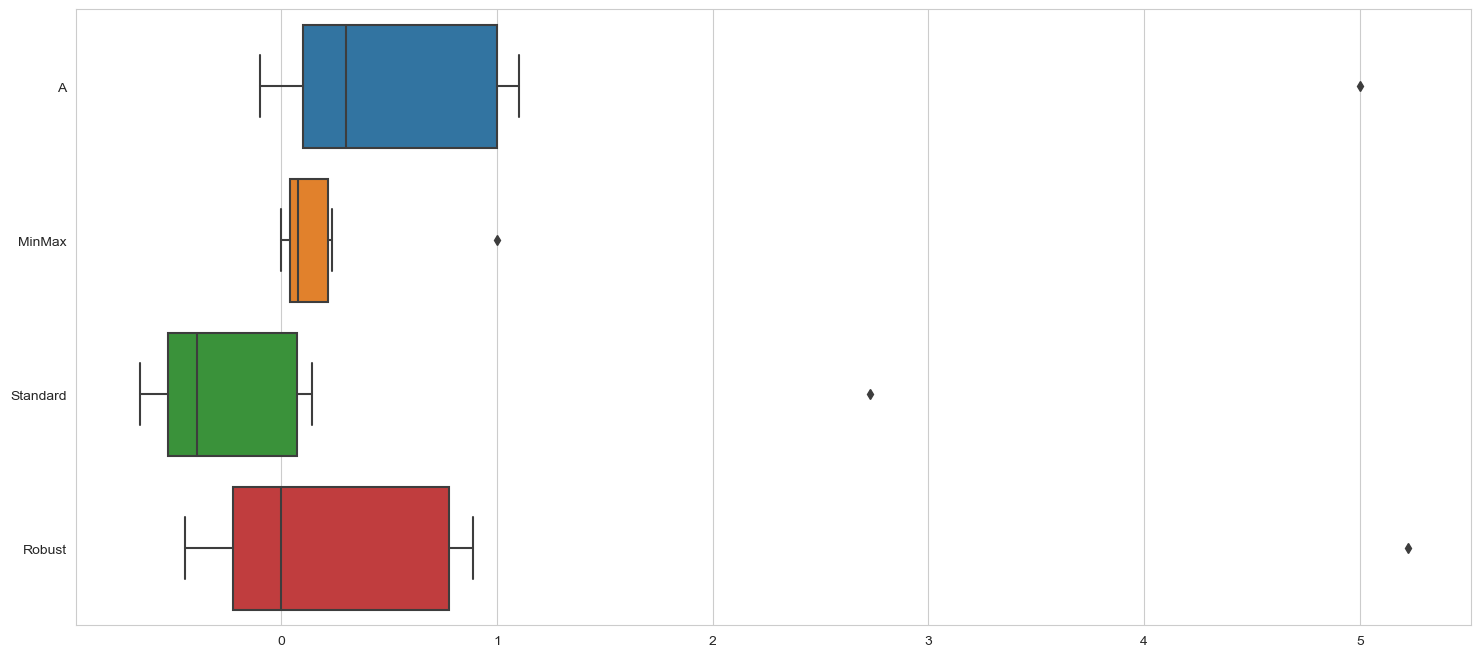

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style(style='whitegrid')
plt.figure(figsize=(18,8))
sns.boxplot(data=df_scaler, orient='h')

- 원본 데이터에 5라는 아웃라이어가 있었음
- Minmaxscaler는  아웃라이어에 영향을 받는다
- Standard로 마찬가지이다. 
- 하지만 Robust는 중위값을 0으로 가지기 때문에 아웃라이어에 큰 영향을 받지않고 그대로 아웃라이어로 둔다.